In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

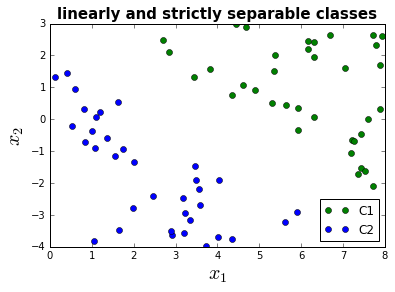

In [2]:
# perceptron

#training data gerneration

x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.xlim([0,8])
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.show()

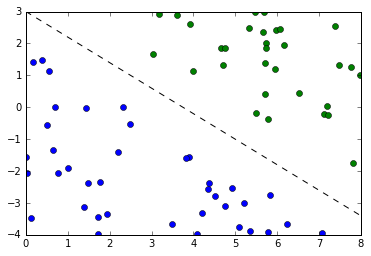

In [11]:
xp = np.array([x_cont/100.0 for x_cont in range(0,801)])

yp = - 0.8*xp + 3
plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.plot(xp, yp, '--k')
plt.show()

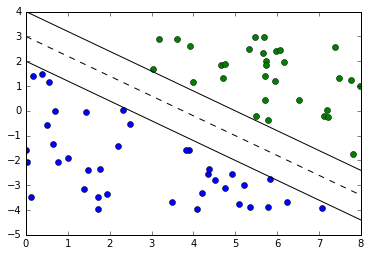

In [12]:
xp = np.array([x_cont/100.0 for x_cont in range(0,801)])

yp = - 0.8*xp + 3
y1 = yp - 1
y2 = yp + 1

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.plot(xp, yp, '--k')
plt.plot(xp, y1, '-k')
plt.plot(xp, y2, '-k')
plt.show()

In [4]:
# CVX using simple classification

n = 2
X1 = np.concatenate((x1[C1], x2[C1]), axis = 1)
X2 = np.concatenate((x1[C2], x2[C2]), axis = 1)
X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)



N = X1.shape[0]
M = X2.shape[0]
w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)
objective = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
constraint = [X1*w + w0 >= 1-u, X2*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

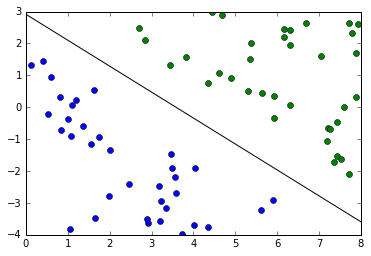

In [5]:
xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2[:, 0], X2[:, 1], 'bo')
plt.plot(xp[0], yhat[0], 'k')
plt.show()

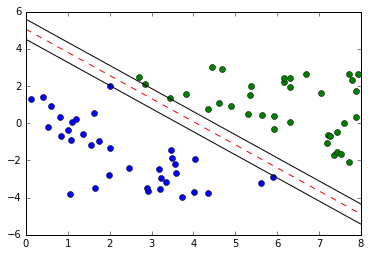

In [13]:
outlier = np.array([[2, 2]]);
X2new = np.concatenate((X2, outlier), 0)

N = X1.shape[0]
M = X2new.shape[0]

w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)

objective = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
constraint = [X1*w + w0 >= 1-u, X2new*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2new[:, 0], X2new[:, 1], 'bo')
plt.plot(xp[0], yhat[0], 'r--')
plt.plot(xp[0], p1[0], 'k')
plt.plot(xp[0], p2[0], 'k')
plt.show()

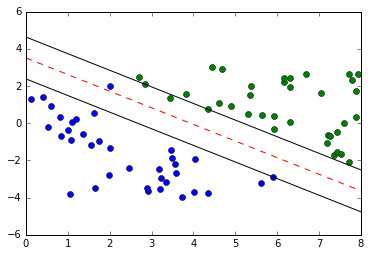

In [19]:

outlier = np.array([[2, 2]]);


g = 1

X2new = np.concatenate((X2, outlier), 0)

N = X1.shape[0]
M = X2new.shape[0]

w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)

objective = cvx.Minimize(cvx.norm2(w) + np.ones((1,N))*u + np.ones((1,M))*v)
constraint = [X1*w + w0 >= 1-u, X2new*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2new[:, 0], X2new[:, 1], 'bo')
plt.plot(xp[0], yhat[0], 'r--')
plt.plot(xp[0], p1[0], 'k')
plt.plot(xp[0], p2[0], 'k')
plt.show()

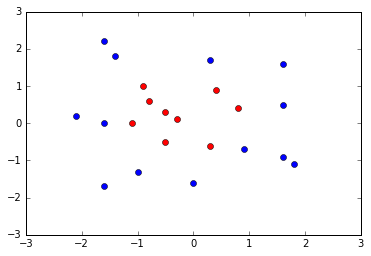

In [73]:
x_c1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
x_c2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.show()


In [103]:
c1n = x_c1.shape[0]
c2n = x_c2.shape[0]

x = np.concatenate((x_c1, x_c2), 0)
y = np.concatenate((np.ones((c1n, 1)), -np.ones((c2n, 1))), 0)


n = 3
m = c1n + c2n
g = 1

z = np.zeros((m, 3))

z[:, 0] = x[:, 0]**2
z[:, 1] = np.sqrt(2)*x[:,0]*x[:,1]
z[:, 2] = x[:,1]**2



w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
d = cvx.Variable(m, 1)



objective = cvx.Minimize(cvx.norm2(w) + g*np.matrix(np.ones((1, m)))*d)
constraint = [cvx.mul_elemwise(y,(np.matrix(z)*w + w0)) >= 1-d, d>=0]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

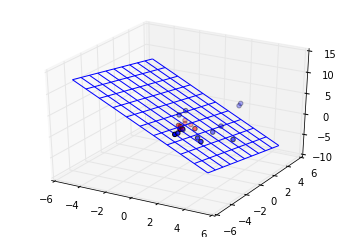

In [104]:
[X1, X2] = np.meshgrid([x1 for x1 in range(-5,6,1)],[x2 for x2 in range(-5,6,1)])
hyper = (-w[0]*X1 - w[1]*X2 - w0)/x[2, 0]

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(z[0:c1n, 0], z[0:c1n, 1], z[0:c1n, 2], c='r' )
ax.scatter3D(z[c1n+1:, 0], z[c1n+1:, 1], z[c1n+1:, 2], c='b')

ax.plot_wireframe(X1, X2, hyper)
plt.show()

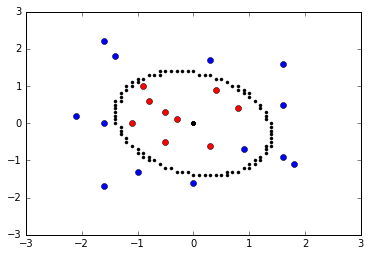

In [134]:
[X1g, X2g] = np.meshgrid([x1/10. for x1 in range(-30,31,1)],[x2/10. for x2 in range(-30,31,1)])

x_test = np.concatenate((X1g.reshape(X1g.shape[0]**2,1, order ="F"), X2g.reshape(X2g.shape[0]**2,1, order = "F")), 1)

z_test = np.zeros((x_test.shape[0],3))

z_test[:, 0] = x_test[:, 0]**2
z_test[:, 1] = np.sqrt(2)*x_test[:,0]*x_test[:,1]
z_test[:, 2] = x_test[:,1]**2

y_hat = z_test.dot(w) + w0

B = np.zeros((np.shape(y_hat)[0],2))

for i in range(0, y_hat.shape[0]):
    if np.abs(y_hat[i]) < 0.2: 
        B[i,:] = x_test[i,:]

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.plot(B[:, 0], B[:, 1], 'k.')
plt.show()

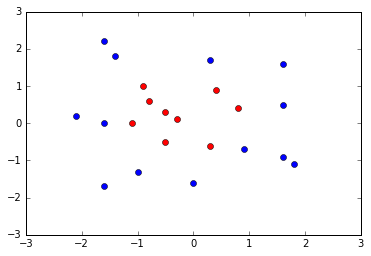

In [135]:
x_c1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
x_c2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.show()


In [168]:
c1n = x_c1.shape[0]
c2n = x_c2.shape[0]

X = np.concatenate((x_c1, x_c2), 0)
y = np.concatenate((np.ones((c1n, 1)), -np.ones((c2n, 1))), 0)


n = 3
m = c1n + c2n

d = 3

K =np.matrix((1 + X.dot(X.transpose()))**d)

g = 1

alp = cvx.Variable(m,1)
u = cvx.Variable(m,1)
objective = cvx.Minimize((0.5)*cvx.sum_entries(cvx.quad_form(alp, K)) + g*cvx.sum_entries(u))
constraint = [cvx.mul_elemwise(y,(K*alp)) >= 1-u, u>=0]
prob = cvx.Problem(objective, constraint)
prob.solve()

alp = np.asarray(alp.value)


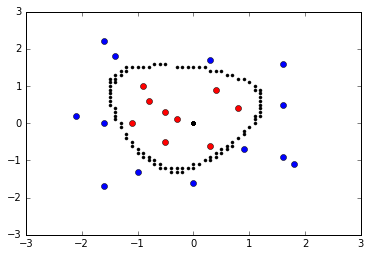

In [173]:
[Xg, Xg] = np.meshgrid([x1/10. for x1 in range(-20,21,1)],[x2/10. for x2 in range(-20,21,1)])

x_test = np.concatenate((X1g.reshape(X1g.shape[0]**2,1, order ="F"), X2g.reshape(X2g.shape[0]**2,1, order = "F")), 1)
k_test = (1 + x_test.dot(X.transpose()))**d

y_hat = k_test.dot(alp)

B = np.zeros((np.shape(y_hat)[0],2))

for i in range(0, y_hat.shape[0]):
    if np.abs(y_hat[i]) < 0.15: 
        B[i,:] = x_test[i,:]

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.plot(B[:, 0], B[:, 1], 'k.')
plt.show()